**Importing Libraries :**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.offline import iplot, plot
from plotly.subplots import make_subplots

colors = ["#8c0404","#f25ed0","#000000","#16A085","#34495E",
           "#21618C ","#512E5F","#45B39D","#AAB7B8 ","#20B2AA",
           "#FF69B4","#00CED1","#FF7F50","#7FFF00","#DA70D6"]

**Loading Dataset :**

In [4]:
df = pd.read_csv('/kaggle/input/netflix-data-cleaning-analysis-and-visualization/netflix1.csv')
df.head(5)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


**Data Cleaning and analysing :**

In [5]:
df.shape

(8790, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [7]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
pd.DataFrame({
    'count':df.shape[0],
    'Nulls':df.isnull().sum(),
    'nulls%':df.isnull().sum()*100,
    'cardinality': df.nunique(),
})

,count,Nulls,nulls%,cardinality
show_id,8790,0,0,8790
type,8790,0,0,2
title,8790,0,0,8787
director,8790,0,0,4528
country,8790,0,0,86
date_added,8790,0,0,1713
release_year,8790,0,0,74
rating,8790,0,0,14
duration,8790,0,0,220
listed_in,8790,0,0,513


**Deleting unnecessary columns :**

In [11]:
df.drop(columns=['show_id'],inplace=True)

In [13]:
df.head(2)

,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."


**Analysing Release Year :**

In [61]:
df['release_year'].nunique()

74

In [63]:
release_years=df.groupby('release_year')['release_year'].value_counts().reset_index()
release_years

,release_year,count
0,1925,1
1,1942,2
2,1943,3
3,1944,3
4,1945,4
...,...,...
69,2017,1030
70,2018,1146
71,2019,1030
72,2020,953


In [64]:
top10_years=release_years.sort_values(by='count',ascending=False).head(10)
top10_years

,release_year,count
70,2018,1146
71,2019,1030
69,2017,1030
72,2020,953
68,2016,901
73,2021,592
67,2015,555
66,2014,352
65,2013,286
64,2012,236


In [65]:
top10_years=top10_years.sort_values(by='release_year')
top10_years

,release_year,count
64,2012,236
65,2013,286
66,2014,352
67,2015,555
68,2016,901
69,2017,1030
70,2018,1146
71,2019,1030
72,2020,953
73,2021,592


**Visualization :**

In [15]:
types_M_or_TV=df['type'].value_counts()
types_M_or_TV

type
Movie      6126
TV Show    2664
Name: count, dtype: int64

In [73]:
iplot(px.bar(types_M_or_TV,
             text_auto=True,
             color = types_M_or_TV.index,
             color_discrete_sequence = colors[3:9], 
             title='Compare Between Two Types',
             labels=dict(index="types_M_or_TV",value="count")
))

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



**Directors :**

In [39]:
directors = df['director'].value_counts()
directors

director
Not Given                         2588
Rajiv Chilaka                       20
Alastair Fothergill                 18
Raúl Campos, Jan Suter              18
Suhas Kadav                         16
                                  ... 
Matt D'Avella                        1
Parthiban                            1
Scott McAboy                         1
Raymie Muzquiz, Stu Livingston       1
Mozez Singh                          1
Name: count, Length: 4528, dtype: int64

In [46]:
iplot(px.pie(values=[directors[0], given_directors],
             names=['Given Directors', 'Not Given Directors'],
             title='Given Directors Vs Not Given Directors',
             color_discrete_sequence=['#7FFF00', '#221F1F']
            ).update_traces(textinfo='value+percent'))

/tmp/ipykernel_34/3084934219.py:1: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



**Info about Countries and release year :**

In [66]:
df['country'].nunique()

86

In [48]:
countries = df['country'].value_counts()[:10]
countries

country
United States     3240
India             1057
United Kingdom     638
Pakistan           421
Not Given          287
Canada             271
Japan              259
South Korea        214
France             213
Spain              182
Name: count, dtype: int64

In [49]:
release_year = df['release_year'].value_counts()
release_year.head(10)

release_year
2018    1146
2017    1030
2019    1030
2020     953
2016     901
2021     592
2015     555
2014     352
2013     286
2012     236
Name: count, dtype: int64

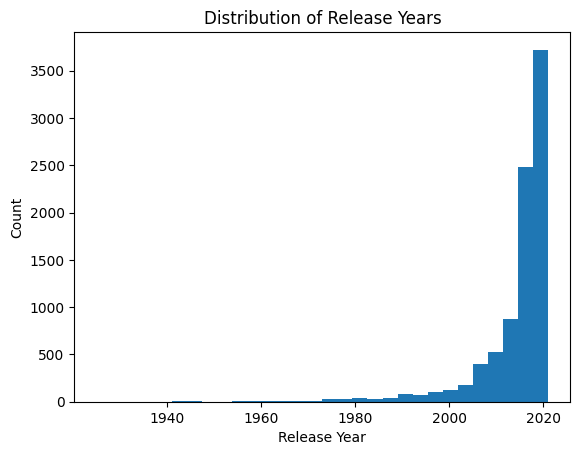

In [50]:
df['release_year'].plot(kind='hist', bins=30)
plt.title('Distribution of Release Years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

**Duration :**

In [54]:
duration =df['duration'].value_counts()
duration.head(10)

duration
1 Season     1791
2 Seasons     421
3 Seasons     198
90 min        152
97 min        146
93 min        146
94 min        146
91 min        144
95 min        137
96 min        130
Name: count, dtype: int64

In [68]:
seasons = df[df['duration'].str.contains('Season')]
seasons_count = seasons['duration'].value_counts()[:5]
seasons_count

duration
1 Season     1791
2 Seasons     421
3 Seasons     198
4 Seasons      94
5 Seasons      64
Name: count, dtype: int64

In [70]:
iplot(px.bar(seasons_count,
    title="Season per TV Show",
    color = seasons_count.index,
    orientation = 'h',
    height = 360,
    text_auto=True,
    labels =dict(index='Seasons',value='Sum'),
))

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



**Category :**

In [56]:
categories = df['listed_in'].str.split(', ', expand=True)

categories = categories.melt(value_name='category').dropna()['category']

top_categories = categories.value_counts().head(10)

top_categories

category
International Movies        2752
Dramas                      2426
Comedies                    1674
International TV Shows      1349
Documentaries                869
Action & Adventure           859
TV Dramas                    762
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: count, dtype: int64

In [57]:
top_categories_df = pd.DataFrame({'Category': top_categories.index, 'Count': top_categories.values})

fig = px.bar(top_categories_df, x='Count', y='Category', orientation='h',
             title='Top 10 Popular Categories for Movies & TV Shows',
             labels={'Count': 'Number of Shows', 'Category': 'Category'},
             color=top_categories_df.index,
             text='Count')

fig.show()

*END*